In [1]:

# Imports
import os
import tempenv
import logging

from sertit import logs, s3
from eoreader.reader import Reader
from eoreader.bands import BLUE


2023-11-15 14:01:58,620 - [DEBUG] - Loading bands ['BLUE']


2023-11-15 14:01:58,829 - [DEBUG] - Read BLUE


2023-11-15 14:02:00,349 - [DEBUG] - Manage nodata for band BLUE


2023-11-15 14:02:00,350 - [DEBUG] - Converting BLUE to reflectance


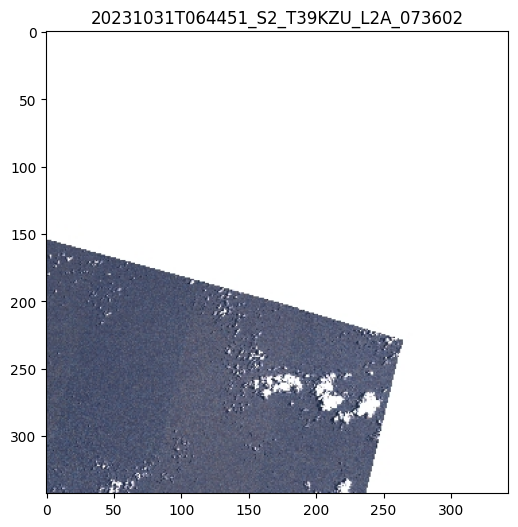

In [2]:
with tempenv.TemporaryEnvironment({
    "AWS_S3_ENDPOINT": "s3.us-west-2.amazonaws.com",
}):
    with s3.temp_s3(no_sign_request=True):
        logs.init_logger(logging.getLogger("eoreader"), logging.DEBUG)
        path = r"s3://sentinel-cogs/sentinel-s2-l2a-cogs/39/K/ZU/2023/10/S2A_39KZU_20231031_0_L2A"
        prod = Reader().open(path)
        prod.plot()
        blue = prod.load(BLUE)[BLUE]

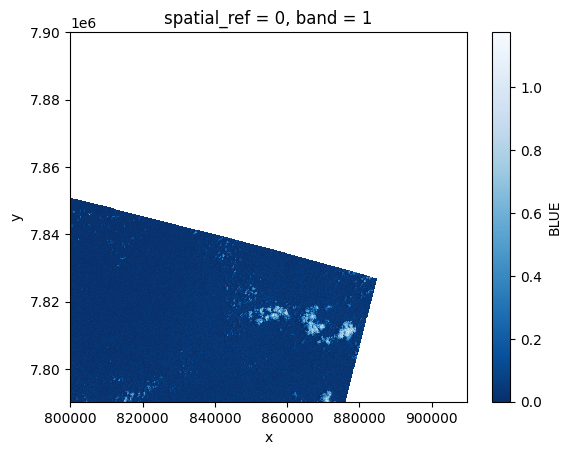

In [3]:
blue[:, ::10, ::10].plot(cmap="Blues_r")

2023-11-15 14:04:49,153 - [DEBUG] - Loading bands ['BLUE']


2023-11-15 14:04:49,200 - [DEBUG] - Read BLUE


2023-11-15 14:04:49,783 - [DEBUG] - Manage nodata for band BLUE


2023-11-15 14:04:50,128 - [DEBUG] - Converting BLUE to reflectance


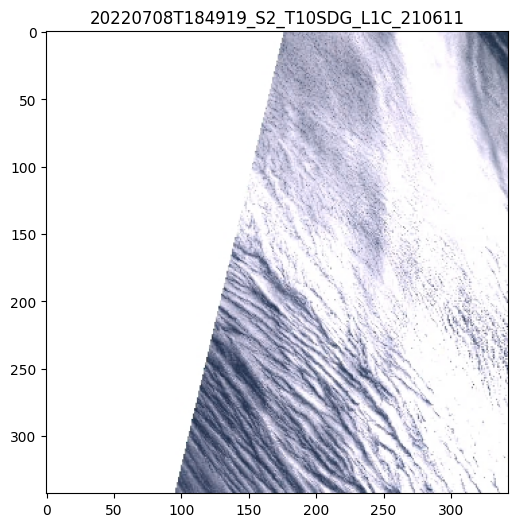

In [4]:
with tempenv.TemporaryEnvironment({
    "AWS_S3_ENDPOINT": "s3.eu-central-1.amazonaws.com",
    "AWS_SECRET_ACCESS_KEY": os.getenv("AMAZON_AWS_SECRET_ACCESS_KEY"),
    "AWS_ACCESS_KEY_ID": os.getenv("AMAZON_AWS_ACCESS_KEY_ID"),
}):
    with s3.temp_s3(requester_pays=True):
        path = r"s3://sentinel-s2-l1c/tiles/10/S/DG/2022/7/8/0"
        prod = Reader().open(path)
        prod.plot()
        blue = prod.load(BLUE)[BLUE]